In [ ]:
# Import necessary libraries
import json
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime, time
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Goal: Read data from a JSON file, handle JSON decoding errors, and create a DataFrame from the user data.

# Initialize an empty list to store user data
user_data = []

# Open and read the 'user_extended.json' file, which contains JSON data
with open('./sample_data/user_extended.json', 'r', encoding='utf-8') as file:
    # Iterate through each line in the file
    for line in file:
        try:
            # Try to parse each line of JSON data and append it to the user_data list
            user_data.append(json.loads(line))
        except json.JSONDecodeError as e:
            # Handle any JSON decoding errors and print the error message
            print(f"Error decoding JSON: {e}")

# Create a DataFrame from the user data
df_user = pd.DataFrame(user_data)

# Output the first few entries of the user DataFrame to check the data
print(df_user.head())

Error decoding JSON: Expecting ',' delimiter: line 1 column 46560 (char 46559)
                  user_id   name  review_count        yelping_since  useful  \
0  2WnXYQFK0hXEoTxPtV2zvg  Steph           665  2008-07-25 10:41:00    2086   
1  SZDeASXq7o05mMNLshsdIA   Gwen           224  2005-11-29 04:38:33     512   
2  hA5lMy-EnncsH4JoR-hFGQ  Karen            79  2007-01-05 19:40:59      29   
3  cxuxXkcihfCbqt5Byrup8Q    Rob            12  2009-02-24 03:09:06       6   
4  E9kcWJdJUHuTKfQurPljwA   Mike           358  2008-12-11 22:11:56     399   

   funny  cool                     elite  \
0   1010  1003  2009,2010,2011,2012,2013   
1    330   299            2009,2010,2011   
2     15     7                             
3      1     0                             
4    102   143                             

                                             friends  fans  ...  \
0  LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
1  enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74

In [ ]:
# Goal: Read data from a JSON file containing reviews, handle JSON decoding errors, and create a DataFrame.

# Initialize an empty list to store review data
review_data = []

# Open and read the 'review_extended.json' file, which contains JSON data
with open('./sample_data/review_extended.json', 'r', encoding='utf-8') as file:
    # Iterate through each line in the file
    for line in file:
        try:
            # Try to parse each line of JSON data and append it to the review_data list
            review_data.append(json.loads(line))
        except json.JSONDecodeError as e:
            # Handle any JSON decoding errors and print the error message
            print(f"Error decoding JSON: {e}")

# Create a DataFrame from the review data
df_review = pd.DataFrame(review_data)

# Output the first few entries of the review DataFrame to check the data
print(df_review.head())

Error decoding JSON: Unterminated string starting at: line 1 column 270 (char 269)
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the bu

In [ ]:
# Goal: Read data from JSON files, clean up DataFrames by selecting specific columns, and print DataFrame shapes.

# Clean up the df_user DataFrame by selecting specific columns
df_user = df_user[['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'fans', 'average_stars']]

# Print the first few entries of the df_review DataFrame to check the data
print(df_review.head())

# Select specific columns in the df_review DataFrame
df_review = df_review[['review_id', 'business_id', 'user_id', 'stars', 'date', 'text']]

# Print the shapes (number of rows and columns) of both DataFrames
print(df_user.shape)
print(df_review.shape)

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

In [ ]:
# Goal: Merge two DataFrames on the 'user_id' column, compare unique user IDs before and after the merge, and print the merged DataFrame.

# Merge the two DataFrames df_review and df_user on the 'user_id' column using an inner join
df_merged = pd.merge(df_review, df_user, on='user_id', how='inner')

# Check the number of unique user IDs before and after the merge in the df_review DataFrame
unique_users_review = df_review['user_id'].nunique()
unique_users_merged = df_merged['user_id'].nunique()

# Print the count of unique user IDs before and after the merge
print(f"Unique users in reviews before merge: {unique_users_review}")
print(f"Unique users in merged DataFrame: {unique_users_merged}")

# Print the shape (number of rows and columns) of the merged DataFrame
print(df_merged.shape)

# Print the first few entries of the merged DataFrame to examine the merged data
print(df_merged.head())

Unique users in reviews before merge: 175122
Unique users in merged DataFrame: 82247
(154654, 14)
                review_id             business_id                 user_id  \
0  BiTunyQ73aT9WBnpR9DZGw  7ATYjTIgM3jUlt4UM3IypQ  OyoGAe7OKpv6SyGZT5g77Q   
1  sk6u1nDJVafRvfID_b8BKQ  qjGS_7iaQDpbVhS6W8qkHQ  OyoGAe7OKpv6SyGZT5g77Q   
2  6AxgBCNX_PNTOxmbRSwcKQ  gmjsEdUsKpj9Xxu6pdjH0g  r3zeYsv1XFBRA4dJpL78cw   
3  _ZeMknuYdlQcUqng_Im3yg  LHSTtnW3YHCeUkRDGyJOyw  yfFzsLmaWF2d4Sr0UNbBgg   
4  rGQRf8UafX7OTlMNN19I8A  uMvVYRgGNXf5boolA9HXTw  1WHRWwQmZOZDAhp2Qyny4g   

   stars                 date  \
0    5.0  2012-01-03 15:28:18   
1    5.0  2015-04-16 16:34:29   
2    5.0  2015-01-03 23:21:18   
3    5.0  2015-08-07 02:29:16   
4    5.0  2015-06-21 14:48:06   

                                                text    name  review_count  \
0  I've taken a lot of spin classes over the year...    Erin            10   
1  Welcome to the neighborhood, Sweet Life Bakesh...    Erin            10   
2  Lov

In [ ]:
# Goal: Ensure the 'date' column is in datetime format, filter the DataFrame for early morning reviews, and extract unique user IDs.

# Ensure the 'date' column is in datetime format
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Create a mask for the time condition (reviews between 1 AM and 11 AM)
mask = (df_merged['date'].dt.hour >= 1) & (df_merged['date'].dt.hour <= 11)

# Filter the DataFrame to keep only early morning reviews
early_morning_reviews = df_merged[mask]

# Extract unique user IDs from the filtered DataFrame
early_morning_user_ids = early_morning_reviews['user_id'].unique()

# Output the result: Count of unique user IDs who left early morning reviews
len(early_morning_user_ids)

29494

In [ ]:
# Goal: Filter the original DataFrame for reviews by early morning users, identify users with exactly one review,
# and find businesses that were reviewed more than once by these users.

# Filter the original DataFrame for reviews by the early morning users
early_morning_reviews_df = df_merged[df_merged['user_id'].isin(early_morning_user_ids)]

# Group by 'user_id' and count the number of reviews for each user
early_morning_review_counts = early_morning_reviews_df.groupby('user_id').size()

# Identify users with exactly one review
users_with_one_review_ids = early_morning_review_counts[early_morning_review_counts == 1].index

# Filter reviews to include only those by users with one review
single_reviews_df = df_merged[df_merged['user_id'].isin(users_with_one_review_ids)]

# Check for businesses that were reviewed more than once by these users
business_review_counts = single_reviews_df['business_id'].value_counts()
duplicate_business_reviews = business_review_counts[business_review_counts > 1]

# Output the results: Businesses reviewed more than once by users with one review
duplicate_business_reviews

GBTPC53ZrG1ZBY3DT8Mbcw    274
SZU9c8V2GuREDN5KgyHFJw    177
PY9GRfzr4nTZeINf346QOw    162
W4ZEKkva9HpAdZG88juwyQ    117
Zi-F-YvyVOK0k5QD7lrLOg     95
                         ... 
ruFtZKwlJASx5BTk1dh5AQ      2
EAtdpksdWfWAaqh3XdnNNg      2
ememkqCmIAkZ3LJxLbf9Vg      2
BVndHaLihEYbr76Z0CMEGw      2
OiNrqVY54pHo5bsxH9zmCg      2
Name: business_id, Length: 2300, dtype: int64

In [ ]:
# Goal: Identify users with exactly one review, calculate their average star rating, and merge the information with the user DataFrame.

# Identify users with exactly one review and store their IDs in a list
users_with_one_review_ids = early_morning_review_counts[early_morning_review_counts == 1].index.tolist()

# Filter the user DataFrame to include only users with one review
users_with_one_review_df = df_user[df_user['user_id'].isin(users_with_one_review_ids)]

# Assuming df_review is our DataFrame containing reviews with 'user_id' and 'stars'
# Calculate the average star rating for each user with one review
average_stars_per_user = df_review[df_review['user_id'].isin(users_with_one_review_ids)].groupby('user_id')['stars'].mean().reset_index()

# Merge the average stars with the user DataFrame
users_with_one_review_df = users_with_one_review_df.merge(average_stars_per_user, on='user_id', how='left')

# The resulting users_with_one_review_df should contain the user IDs, their friends, and the average star rating
# Display the DataFrame
users_with_one_review_df

,user_id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,stars
0,k9Q2fyIr86AQKOvTUd22HQ,Claire,202,2007-11-29 22:52:35,241,84,97,12,3.69,5.0
1,l49SiMnSza1t5KdaOpecBQ,Rob,18,2012-03-17 15:35:03,14,5,4,2,3.25,1.0
2,q6iJ3PoohkpMQHS2cRYjuQ,Andrew,140,2008-09-08 23:33:47,143,41,40,6,3.53,4.0
3,dzZ7jClZzg8tcHXcxS19dg,Ken,14,2006-03-17 02:47:19,27,10,11,1,3.87,4.0
4,wEldYiMRs04ykBXBmDXdBw,Kara,21,2008-06-27 18:20:18,48,12,26,6,4.52,5.0
...,...,...,...,...,...,...,...,...,...,...
16481,_ldavW58__55UeaoTI01Tg,Claire,16,2016-06-10 21:08:42,12,5,5,1,3.82,1.0
16482,Qc5cAd9r7GiH6p1tLVbTRw,Tonya,20,2015-03-21 22:57:48,9,2,6,0,3.77,5.0
16483,k23Xl2Ko9yKWHAUdkYVLkg,Laura,11,2016-05-08 16:21:20,7,1,2,0,2.92,5.0
16484,ufDgHQz2P0LkPPdzFYuC_Q,Jennifer,8,2015-08-20 03:47:53,16,0,1,0,3.22,5.0


In [ ]:
# Goal: Define helper functions for scoring and flagging users based on review data
def temporal_score(yelping_since):
    # Calculate a temporal score based on 'yelping_since' timestamp
    review_time = datetime.strptime(yelping_since, '%Y-%m-%d %H:%M:%S').time()
    return 0 if time(1, 0) <= review_time <= time(11, 0) else 1

def is_first_review(row):
    # Determine if a review is the user's first review
    return row['date'] == df_merged[df_merged['user_id'] == row['user_id']]['date'].min()

In [ ]:
# Goal: Apply simple calculations directly to the DataFrame to create various scores for analysis

# 'friends_score' represents the number of fans a user has. It can indicate the user's influence and credibility on the platform.
df_merged['friends_score'] = df_merged['fans']

# 'helpfulness_score' is a cumulative measure of a user's engagement and contribution to the platform, combining 'useful', 'funny', and 'cool' interactions.
df_merged['helpfulness_score'] = df_merged['useful'] + df_merged['funny'] + df_merged['cool']

# 'review_count_score' reflects the number of reviews a user has written, which can be indicative of their experience and activity level on Yelp.
df_merged['review_count_score'] = df_merged['review_count']

# 'temporal_score' is calculated based on the 'yelping_since' field, providing insight into the duration of the user's presence and activity on Yelp.
df_merged['temporal_score'] = df_merged['yelping_since'].apply(temporal_score)

# Converting the 'date' column to datetime format for consistency and ease of analysis.
df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')

In [ ]:
# Goal: Clean and sort the DataFrame for further analysis
df_merged.dropna(subset=['date'], inplace=True)
df_merged.sort_values(['user_id', 'date'], inplace=True)
df_merged['review_day'] = df_merged['date'].dt.normalize()
df_merged['daily_review_count'] = df_merged.groupby(['user_id', 'review_day'])['review_id'].transform('count')

In [ ]:
# Goal: Flag users who write high-frequency reviews
review_frequency_threshold = 10
df_merged['flagged_high_frequency'] = df_merged['daily_review_count'] > review_frequency_threshold

In [ ]:
# Goal: Flag users as suspicious based on a composite score and high-frequency reviews,
# and output counts of suspicious and non-suspicious users.
df_merged['composite_score'] = df_merged[['friends_score', 'helpfulness_score', 'review_count_score', 'temporal_score']].mean(axis=1)

# Determine the threshold for flagging users as suspicious based on the composite score.
threshold = df_merged['composite_score'].quantile(0.25)

# Flag users as suspicious if their composite score is below the threshold or if they have high-frequency reviews.
df_merged['suspicious'] = (df_merged['composite_score'] < threshold) | df_merged['flagged_high_frequency']

# Output the counts of suspicious and non-suspicious users.
print(df_merged['suspicious'].value_counts())

False    116367
True      38287
Name: suspicious, dtype: int64


In [ ]:
# Goal: Calculate 'review_frequency' for users
df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])
df_user['days_on_yelp'] = (pd.Timestamp.now() - df_user['yelping_since']).dt.days
df_user['review_frequency'] = df_user['review_count'] / df_user['days_on_yelp']

In [ ]:
# Goal: Normalize the 'review_frequency' metric using Min-Max scaling
df_user['review_frequency_norm'] = (df_user['review_frequency'] - df_user['review_frequency'].min()) / (df_user['review_frequency'].max() - df_user['review_frequency'].min())

In [ ]:
# Goal: Handle outliers using percentile capping (Winsorization) for specific metrics
for metric in ['review_count', 'useful', 'funny', 'cool', 'fans']:
    # Calculate the 95th percentile for the metric
    percentile_95 = np.percentile(df_user[metric], 95)
    # Cap values at the 95th percentile
    df_user[f'{metric}_capped'] = df_user[metric].apply(lambda x: min(x, percentile_95))

In [ ]:
# Goal: Calculate Z-scores using capped values for specific metrics
for metric in ['review_count_capped', 'useful_capped', 'funny_capped', 'cool_capped', 'fans_capped']:
    # Calculate Z-scores for the capped metric
    df_user[f'{metric}_zscore'] = stats.zscore(df_user[metric])

In [ ]:
# Goal: Use percentile rank to scale the metrics
for metric in ['review_count_capped', 'useful_capped', 'funny_capped', 'cool_capped', 'fans_capped']:
    # Calculate percentile rank for the capped metric
    df_user[f'{metric}_percentile'] = df_user[metric].rank(pct=True)

In [ ]:
# Goal: Combine percentile ranks into a composite credibility index
# This step calculates the average of percentile ranks for all metrics
df_user['credibility_index'] = df_user[['review_count_capped_percentile',
                                        'useful_capped_percentile',
                                        'funny_capped_percentile',
                                        'cool_capped_percentile',
                                        'fans_capped_percentile']].mean(axis=1)

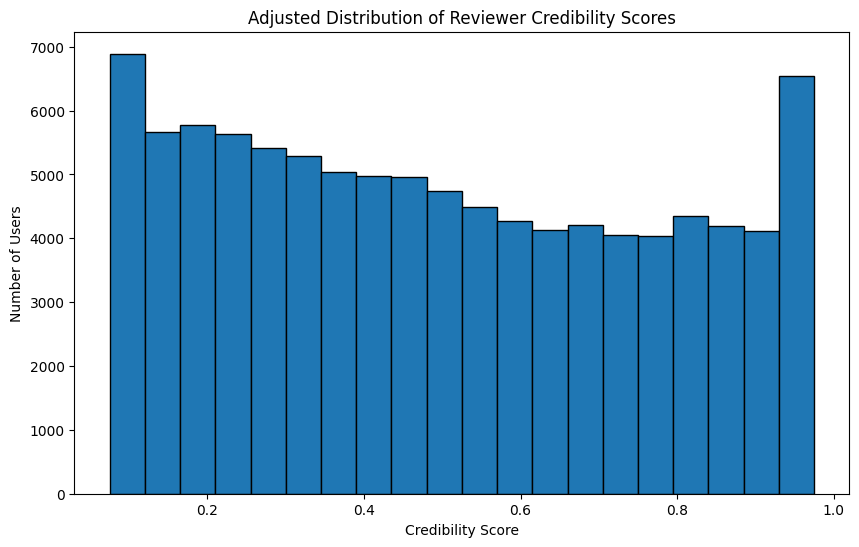

In [ ]:
# Goal: Plot the adjusted credibility index distribution
plt.figure(figsize=(10, 6))
plt.hist(df_user['credibility_index'], bins=20, edgecolor='black')
plt.title('Adjusted Distribution of Reviewer Credibility Scores')
plt.xlabel('Credibility Score')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
# Goal: Validate the high-frequency review flagging by checking the maximum and minimum daily review counts.

# Check the maximum review count for non-flagged users
max_reviews_non_flagged = df_merged[~df_merged['flagged_high_frequency']]['daily_review_count'].max()
print(f"Max daily reviews for non-flagged users: {max_reviews_non_flagged}")

# If our threshold is 10, this number should be 10 or less.

# Check the minimum review count for flagged users
min_reviews_flagged = df_merged[df_merged['flagged_high_frequency']]['daily_review_count'].min()
print(f"Min daily reviews for flagged users: {min_reviews_flagged}")

# This number should be greater than 10, as 10 is our threshold of reviews in a single day (review_frequency_threshold).

Max daily reviews for non-flagged users: 10
Min daily reviews for flagged users: 12


In [ ]:
# Goal: Prepare the data and filter reviews from suspicious and non-suspicious users

# Assuming df_merged is our DataFrame and has been processed as per previous steps
suspicious_reviews = df_merged[df_merged['suspicious']]['text']
non_suspicious_reviews = df_merged[~df_merged['suspicious']]['text']

In [ ]:
# Goal: Download the VADER lexicon for sentiment analysis and define a sentiment analysis function

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to apply sentiment analysis
def analyze_sentiment(review):
    return sia.polarity_scores(review)['compound']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Goal: Apply sentiment analysis to each review and calculate overall sentiment

# Apply sentiment analysis to reviews from suspicious users
suspicious_reviews_sentiment = suspicious_reviews.apply(analyze_sentiment)

# Apply sentiment analysis to reviews from non-suspicious users
non_suspicious_reviews_sentiment = non_suspicious_reviews.apply(analyze_sentiment)

In [ ]:
# Goal: Calculate the mean of the compound sentiment scores and print the results

# Calculate the mean of compound sentiment scores for suspicious users
overall_suspicious_sentiment = suspicious_reviews_sentiment.mean()

# Calculate the mean of compound sentiment scores for non-suspicious users
overall_non_suspicious_sentiment = non_suspicious_reviews_sentiment.mean()

# Print overall sentiment for both suspicious and non-suspicious users
print(f"Overall Sentiment for Suspicious Users: {overall_suspicious_sentiment}")
print(f"Overall Sentiment for Non-Suspicious Users: {overall_non_suspicious_sentiment}")

Overall Sentiment for Suspicious Users: 0.6700811920495208
Overall Sentiment for Non-Suspicious Users: 0.7535045631493466


In [ ]:
# Goal: Aggregate the data to get the count of reviews per day for suspicious and non-suspicious users

# First, aggregate the data to count reviews per day for suspicious and non-suspicious users.
daily_reviews = df_merged.groupby(['review_day', 'suspicious']).size().reset_index(name='review_count')

In [ ]:
# Goal: Pivot the aggregated data so that each user type has its own column

# Pivot the aggregated data to create separate columns for user types.
pivot_daily_reviews = daily_reviews.pivot(index='review_day', columns='suspicious', values='review_count').fillna(0)

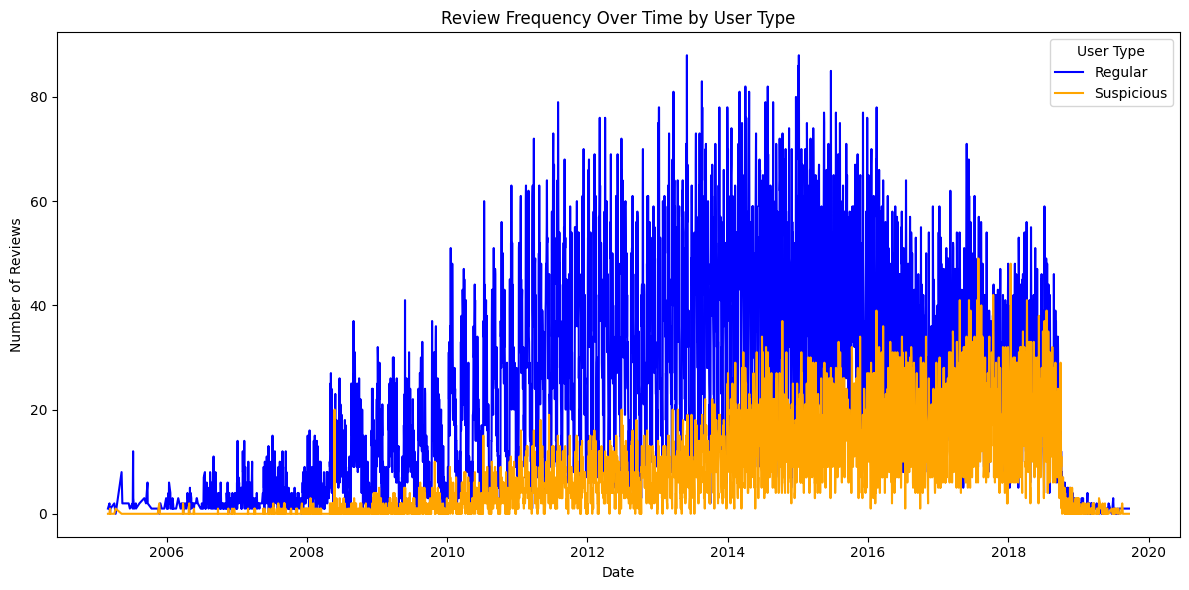

In [ ]:
# Goal: Plot the number of reviews over time for both user types using line plots

# Create a plot to visualize review frequency over time for both user types.
plt.figure(figsize=(12, 6))

# Plot for non-suspicious users.
sns.lineplot(data=pivot_daily_reviews, x=pivot_daily_reviews.index, y=False, label='Regular', color='blue')

# Plot for suspicious users.
sns.lineplot(data=pivot_daily_reviews, x=pivot_daily_reviews.index, y=True, label='Suspicious', color='orange')

plt.title('Review Frequency Over Time by User Type')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='User Type')

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

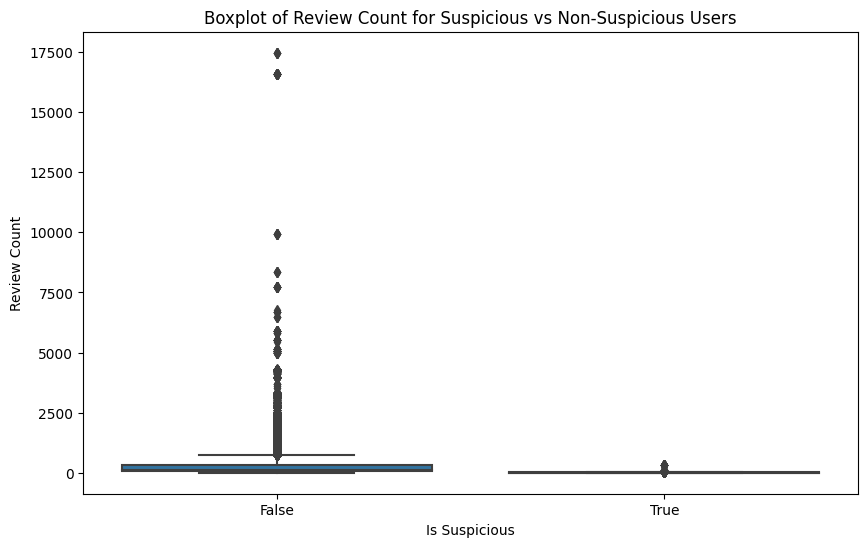

In [ ]:
# @title
# Goal: Create boxplots to visualize the distribution of 'review_count' for suspicious versus not suspicious users

# Create a figure for the boxplots
plt.figure(figsize=(10, 6))

# Create boxplots
sns.boxplot(x='suspicious', y='review_count', data=df_merged)

# Set title and labels
plt.title('Boxplot of Review Count for Suspicious vs Non-Suspicious Users')
plt.xlabel('Is Suspicious')
plt.ylabel('Review Count')

# Show the plot
plt.show()